In [15]:
# Problem 1
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (8, 6),
    "figure.dpi": 200,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

L = 20
J = 1.0
T = 1.0
beta = 1.0 / T

def initialize_lattice(L):
    return np.random.choice([1, -1], size=(L, L))
spins = initialize_lattice(L)

def total_energy(spins, J):
    E = 0.0
    L = spins.shape[0]
    
    for i in range(L):
        for j in range(L):
            if i < L - 1:
                E -= J * spins[i, j] * spins[i + 1, j]
            if j < L - 1:
                E -= J * spins[i, j] * spins[i, j + 1]
    
    return E

def magnetization(spins):
    return np.sum(spins)

def delta_energy(spins, i, j, J):
    L = spins.shape[0]
    s = spins[i, j]
    neighbor_sum = 0
    
    if i > 0:
        neighbor_sum += spins[i - 1, j]
    if i < L - 1:
        neighbor_sum += spins[i + 1, j]
    if j > 0:
        neighbor_sum += spins[i, j - 1]
    if j < L - 1:
        neighbor_sum += spins[i, j + 1]
    
    return 2 * J * s * neighbor_sum

def metropolis_step(spins, beta, J):
    L = spins.shape[0]
    
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    
    dE = delta_energy(spins, i, j, J)
    
    if dE <= 0:
        spins[i, j] *= -1
    else:
        if np.random.rand() < np.exp(-beta * dE):
            spins[i, j] *= -1

def run_simulation(spins, beta, J, n_steps):
    M_history = np.zeros(n_steps)
    
    for step in range(n_steps):
        metropolis_step(spins, beta, J)
        M_history[step] = magnetization(spins)
    
    return M_history

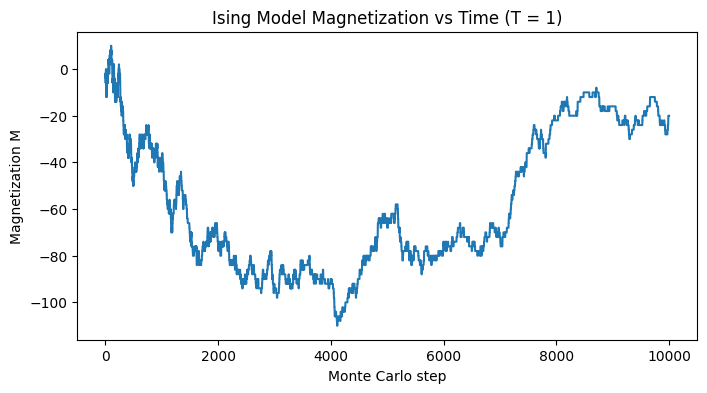

In [12]:
n_steps = 10_000
spins = initialize_lattice(L)

M_history = run_simulation(spins, beta, J, n_steps)

plt.figure(figsize=(8, 4))
plt.plot(M_history)
plt.xlabel("Monte Carlo step")
plt.ylabel("Magnetization M")
plt.title("Ising Model Magnetization vs Time (T = 1)")
plt.show()

In [13]:
n_steps = 1_000_000
spins = initialize_lattice(L)

M_history = run_simulation(spins, beta, J, n_steps)


In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(M_history)
plt.xlabel("Monte Carlo step")
plt.ylabel("Magnetization M")
plt.title("Ising Model Magnetization vs Time (T = 1)")
plt.tight_layout()
plt.savefig("figs/ising.png", dpi=350, bbox_inches="tight")

In [ ]:
snapshot_times = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
def run_ising_with_snapshots(L, beta, J, n_steps, snapshot_times):
    spins = initialize_lattice(L)
    snapshots = {}
    
    for step in range(1, n_steps + 1):
        metropolis_step(spins, beta, J)
        
        if step in snapshot_times:
            snapshots[step] = spins.copy()
    
    return snapshots

snapshots = run_ising_with_snapshots(
    L=L,
    beta=beta,
    J=J,
    n_steps=n_steps,
    snapshot_times=snapshot_times
)

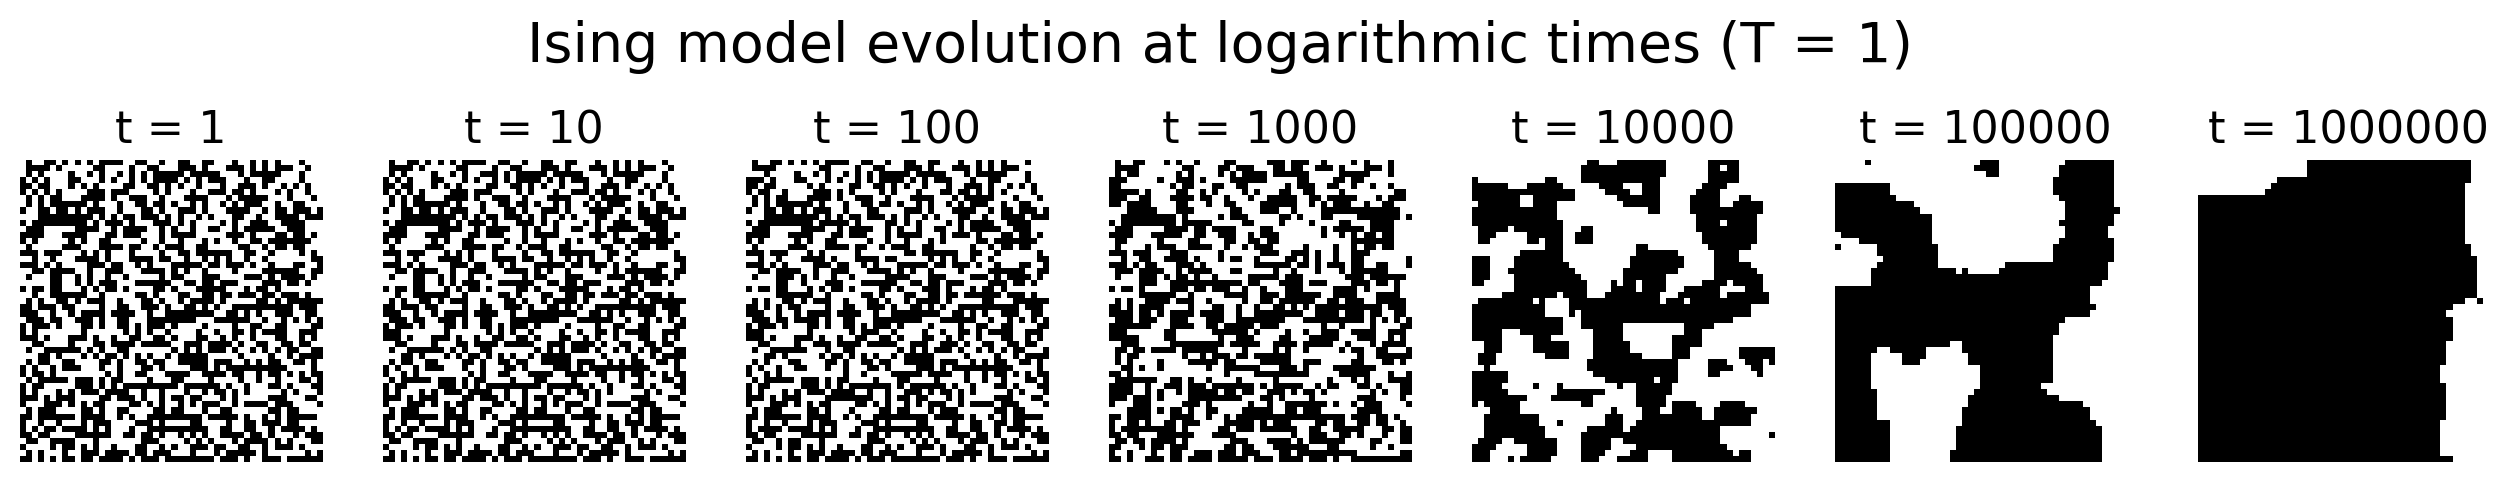

In [51]:
fig, axes = plt.subplots(1, len(snapshot_times), figsize=(16, 3))

for ax, t in zip(axes, snapshot_times):
    ax.imshow(snapshots[t], cmap="gray", vmin=-1, vmax=1)
    ax.set_title(f"t = {t}")
    ax.axis("off")

plt.suptitle("Ising model evolution at logarithmic times (T = 1)",fontsize=20)
plt.savefig("figs/isingpanel.png",dpi=350)

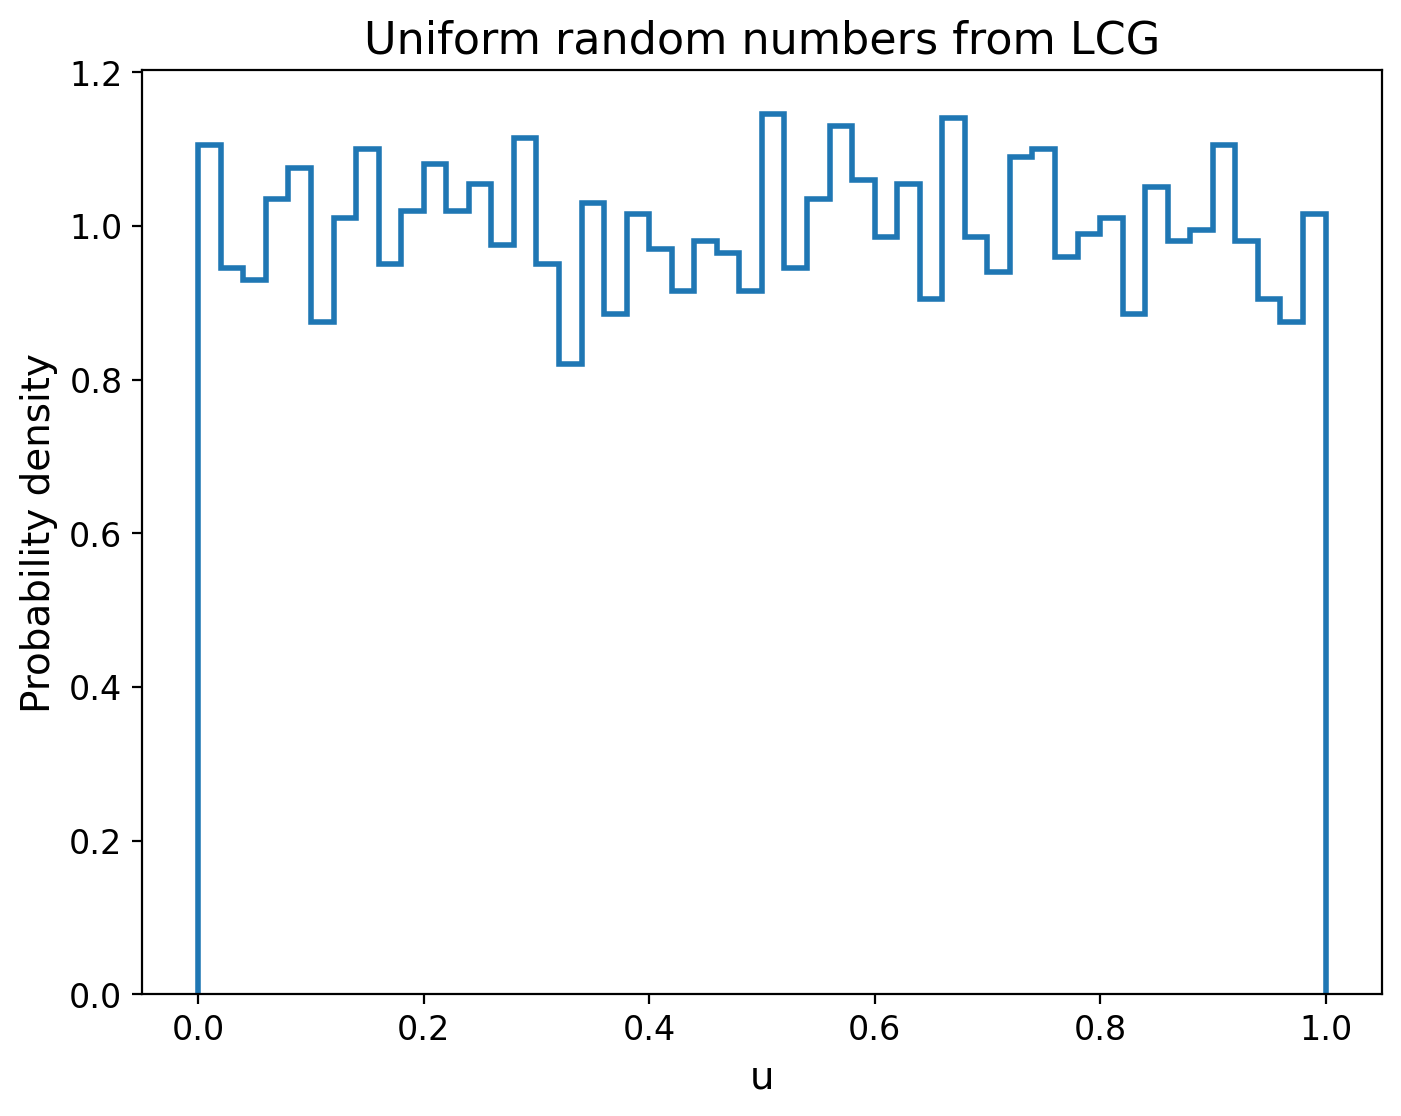

In [27]:
# Problem 3
# values for parameters found on wikipedia
def lcg(n, seed=12345):
    m = 2**32
    a = 1664525 
    c = 1013904223
    
    x = seed
    numbers = np.zeros(n)
    
    for i in range(n):
        x = (a * x + c) % m
        numbers[i] = x / m
    
    return numbers

u = lcg(10000)

plt.hist(u, bins=50, density=True,histtype='step',linewidth=2)
plt.xlabel("u")
plt.ylabel("Probability density")
#plt.ylim(0.8,1.2)
plt.title("Uniform random numbers from LCG")
plt.show()

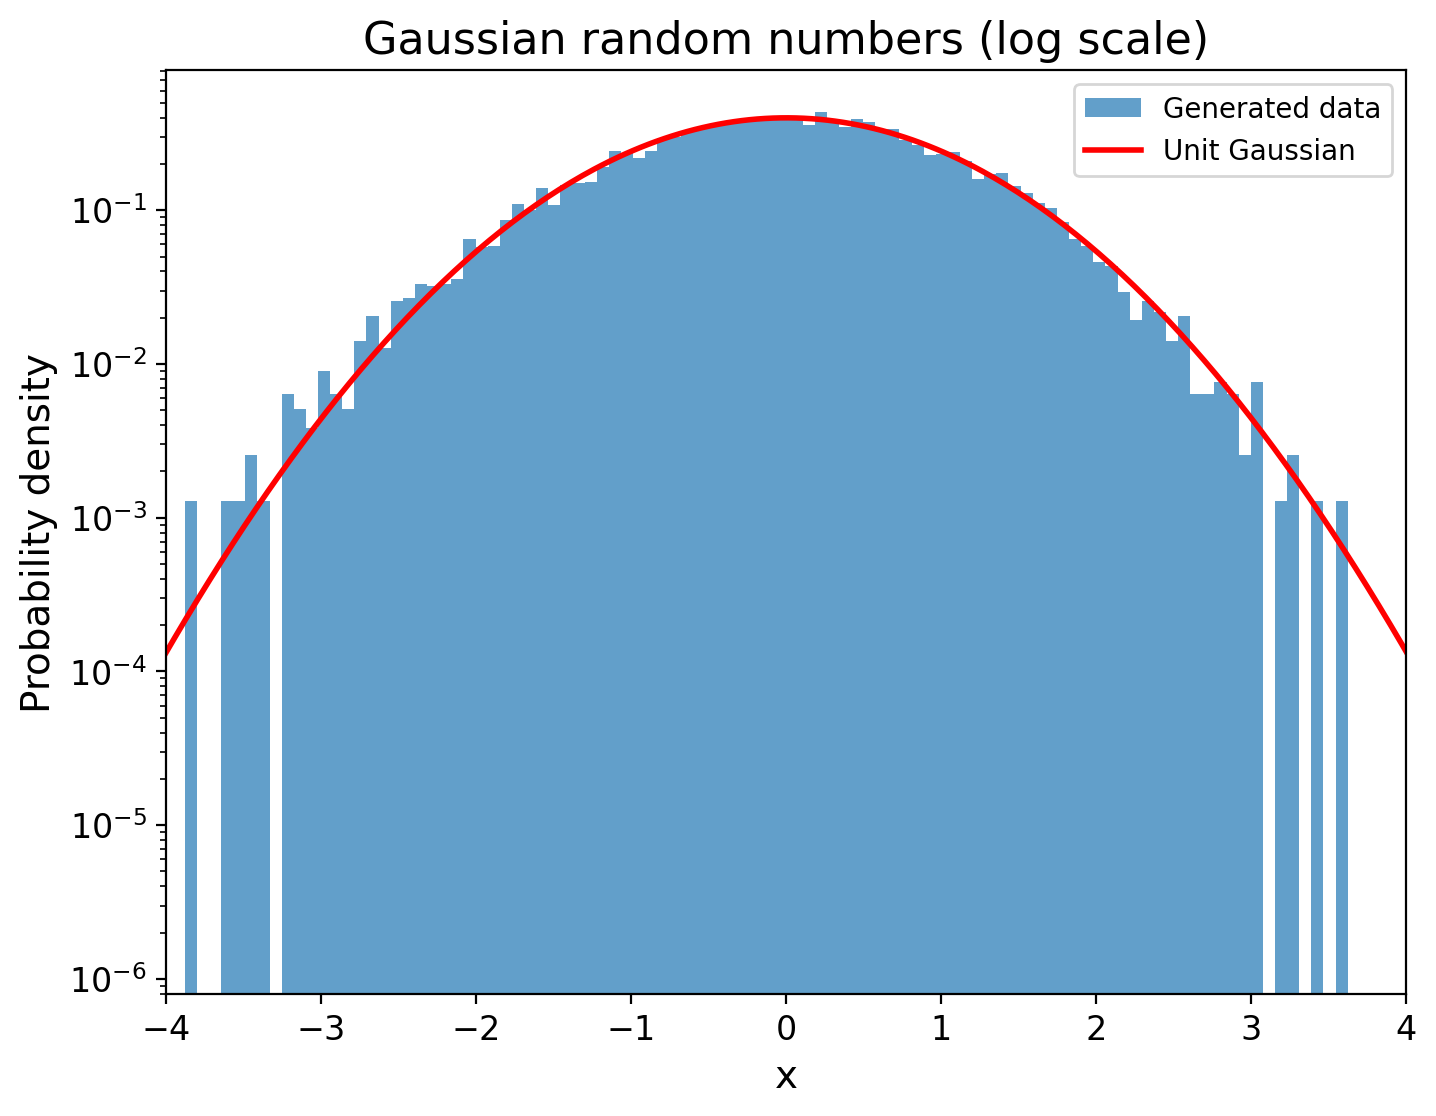

In [30]:
def gaussian_random(n, seed=12345):
    u = lcg(2 * n, seed)
    
    u1 = u[0::2]
    u2 = u[1::2]
    
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z

g = gaussian_random(10000)

x = np.linspace(-5, 5, 400)
gaussian_pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

plt.hist(g, bins=100, density=True, log=True, alpha=0.7, label="Generated data")
plt.plot(x, gaussian_pdf, 'r', label="Unit Gaussian")
plt.xlabel("x")
plt.xlim(-4,4)
plt.ylabel("Probability density")
plt.title("Gaussian random numbers (log scale)")
plt.legend()
plt.savefig("figs/gaussianrand.png", dpi=350, bbox_inches="tight")

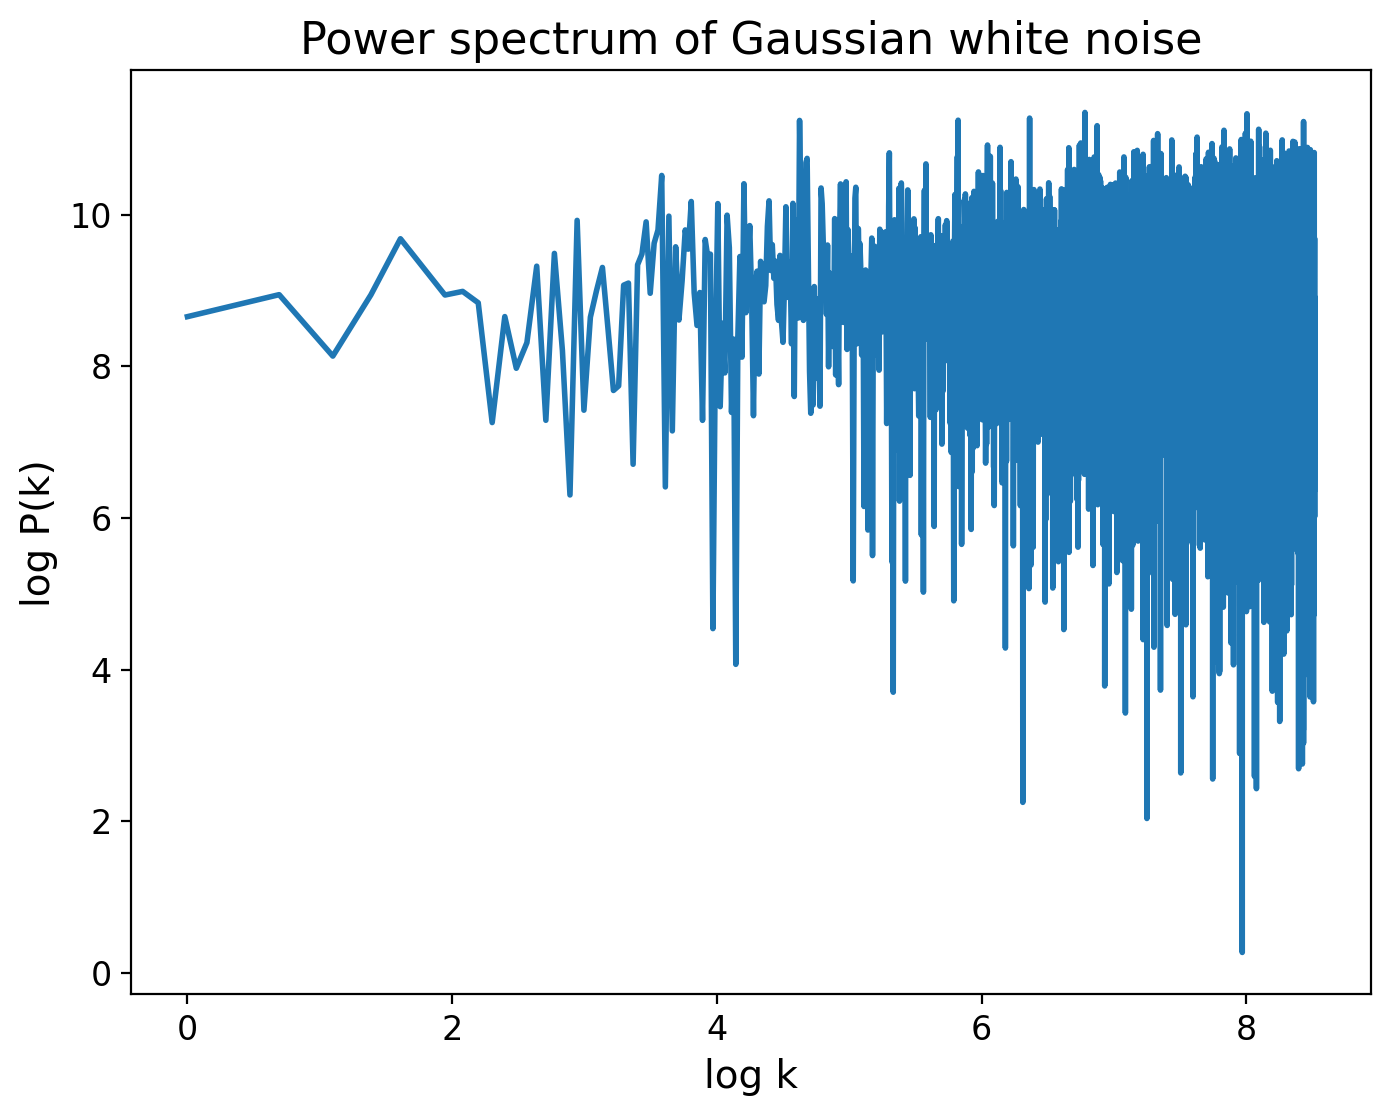

In [34]:
def power_spectrum(data):
    fft_vals = np.fft.fft(data)
    power = np.abs(fft_vals)**2
    return power
    
power_g = power_spectrum(g)
k = np.arange(1, len(power_g)//2)

plt.plot(np.log(k), np.log(power_g[1:len(k)+1]))
plt.xlabel("log k")
plt.ylabel("log P(k)")
plt.title("Power spectrum of Gaussian white noise")
plt.savefig("figs/gausspowerspec.png", dpi=350, bbox_inches="tight")

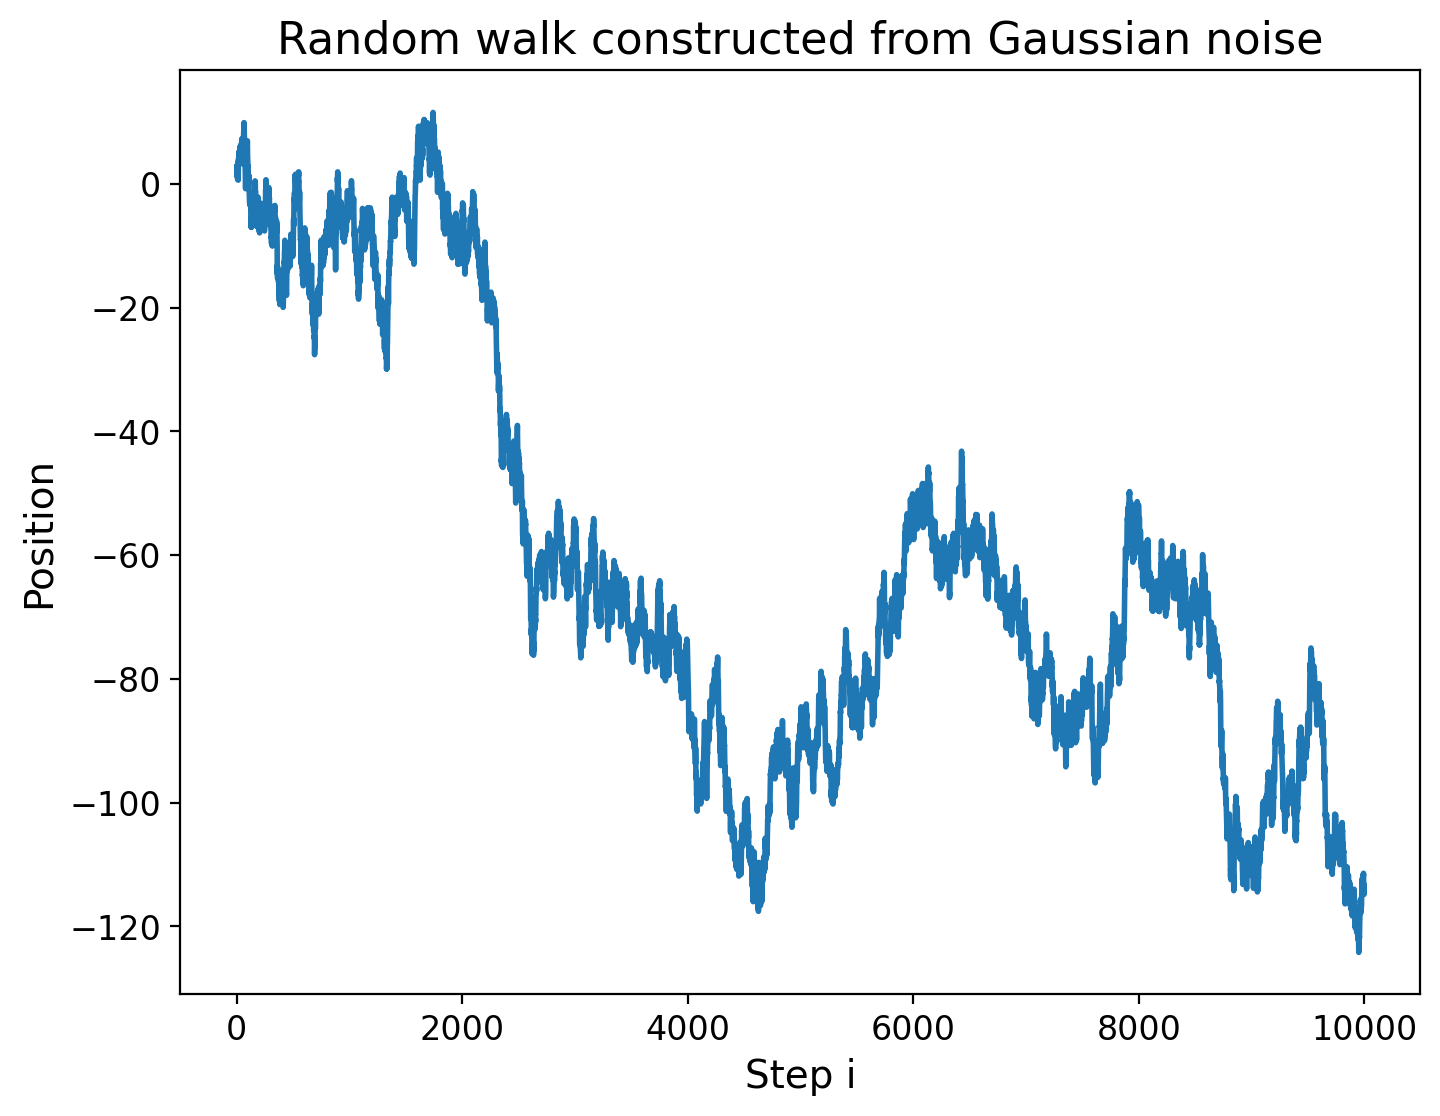

In [36]:
walk = np.cumsum(g)
plt.plot(walk)
plt.xlabel("Step i")
plt.ylabel("Position")
plt.title("Random walk constructed from Gaussian noise")
plt.savefig("figs/randomwalk.png", dpi=350, bbox_inches="tight")

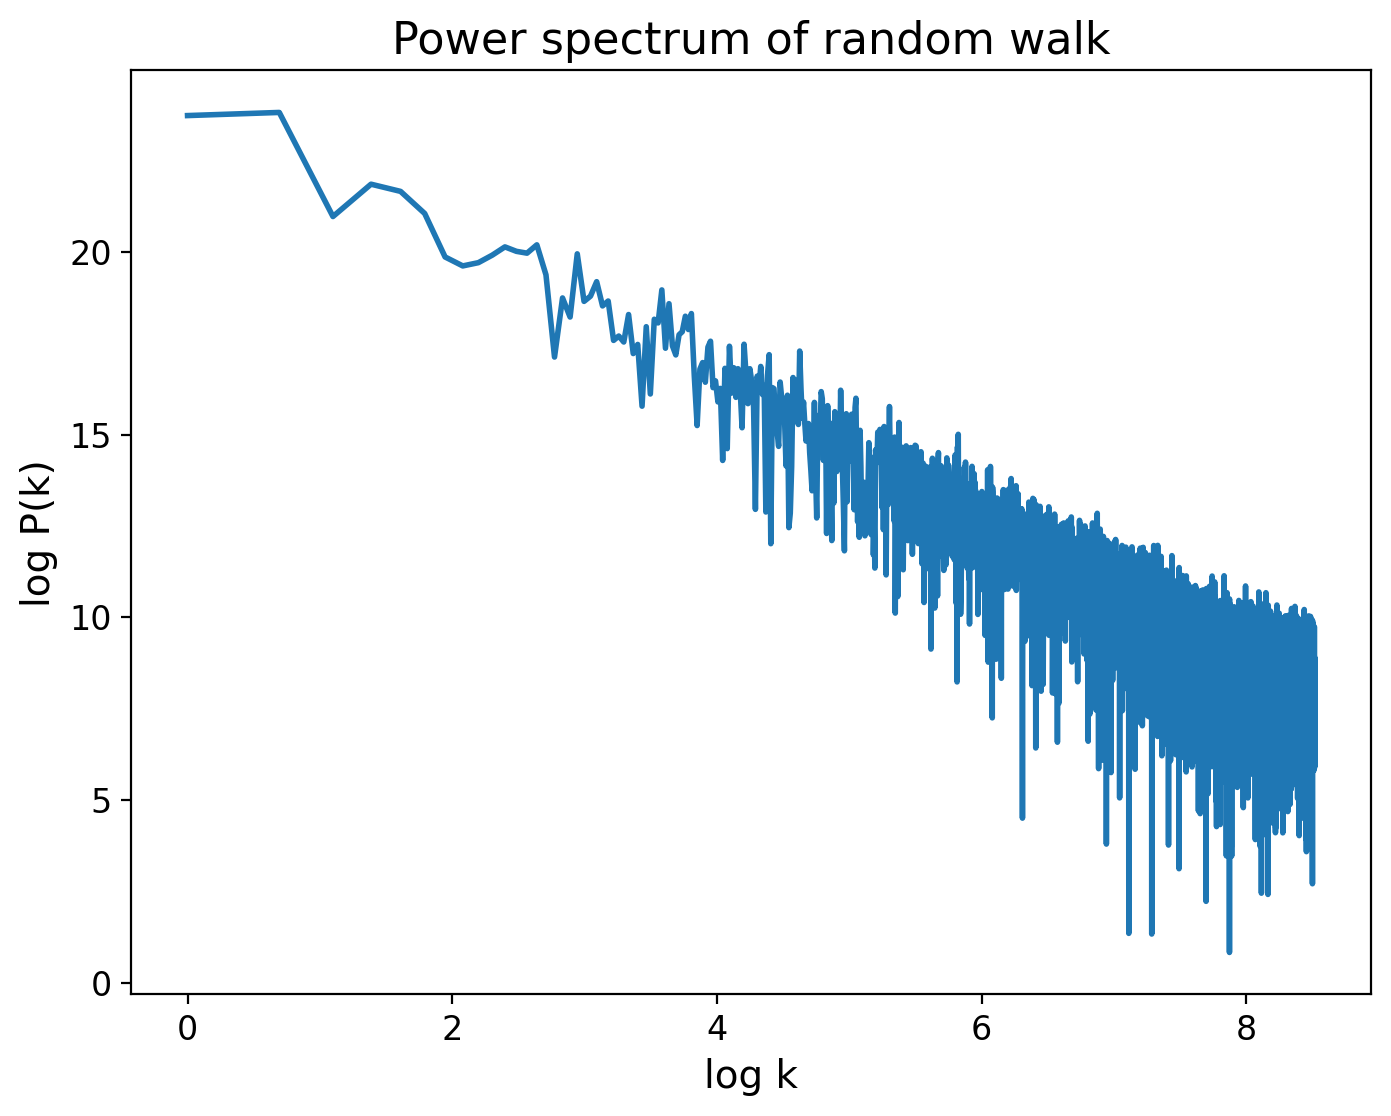

In [37]:
power_walk = power_spectrum(walk)
k = np.arange(1, len(power_walk)//2)

plt.plot(np.log(k), np.log(power_walk[1:len(k)+1]))
plt.xlabel("log k")
plt.ylabel("log P(k)")
plt.title("Power spectrum of random walk")
plt.savefig("figs/randomwalkpowerspec.png", dpi=350, bbox_inches="tight")

In [39]:
# Problem 2
L = 50                
N_steps = 200_000           
T0 = 5.0                    
lattice = initialize_lattice(L)

def random_adjacent_pair(L):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    
    neighbors = []
    if i > 0:
        neighbors.append((i - 1, j))
    if i < L - 1:
        neighbors.append((i + 1, j))
    if j > 0:
        neighbors.append((i, j - 1))
    if j < L - 1:
        neighbors.append((i, j + 1))
    
    ni, nj = neighbors[np.random.randint(len(neighbors))]
    return (i, j), (ni, nj)

def monte_carlo_step(lattice, next_dimer_id, T):
    L = lattice.shape[0]
    (i1, j1), (i2, j2) = random_adjacent_pair(L)
    
    s1 = lattice[i1, j1]
    s2 = lattice[i2, j2]
    
    # Case 1: both empty → add dimer
    if s1 == 0 and s2 == 0:
        lattice[i1, j1] = next_dimer_id
        lattice[i2, j2] = next_dimer_id
        return next_dimer_id + 1
    
    # Case 2: same dimer → remove with Boltzmann probability
    if s1 != 0 and s1 == s2:
        if np.random.rand() < np.exp(-1.0 / T):
            lattice[i1, j1] = 0
            lattice[i2, j2] = 0
    
    return next_dimer_id

def temperature(t, T0, tau):
    return T0 * np.exp(-t / tau)

def run_annealing(L, N_steps, T0, tau):
    lattice = initialize_lattice(L)
    next_dimer_id = 1
    
    early_snapshot = None
    
    for t in range(N_steps):
        T = temperature(t, T0, tau)
        next_dimer_id = monte_carlo_step(lattice, next_dimer_id, T)
        
        if t == N_steps // 10:
            early_snapshot = lattice.copy()
    
    final_snapshot = lattice.copy()
    n_dimers = len(np.unique(lattice)) - (1 if 0 in lattice else 0)
    
    return early_snapshot, final_snapshot, n_dimers

def plot_lattice(lattice, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(lattice > 0, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.savefig("figs/"+title+".png",bboxinches="tight",dpi=350)


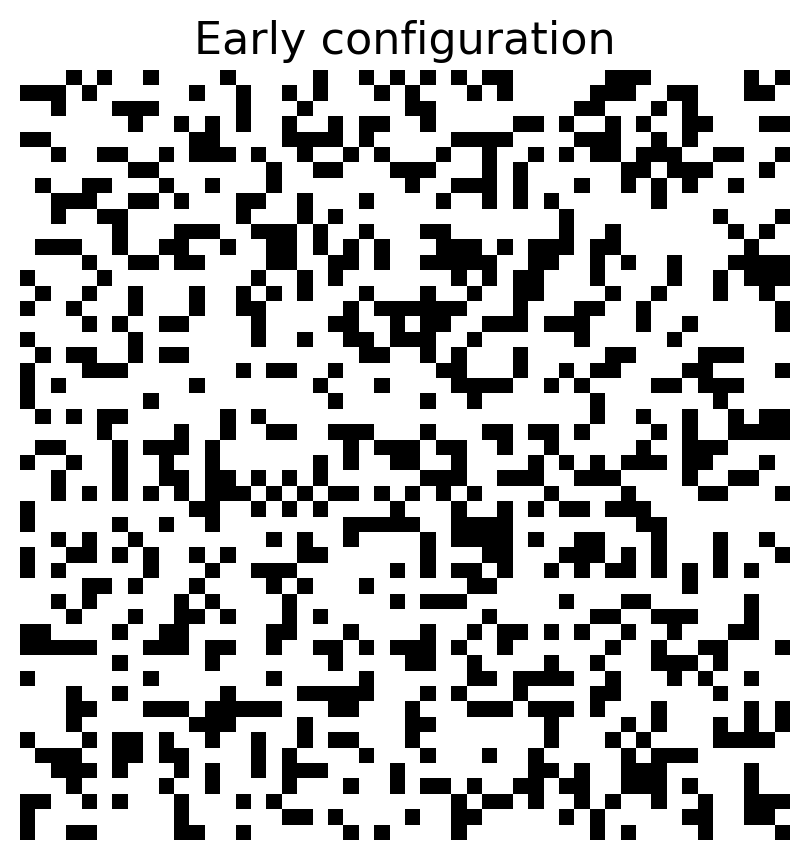

<Figure size 1600x1200 with 0 Axes>

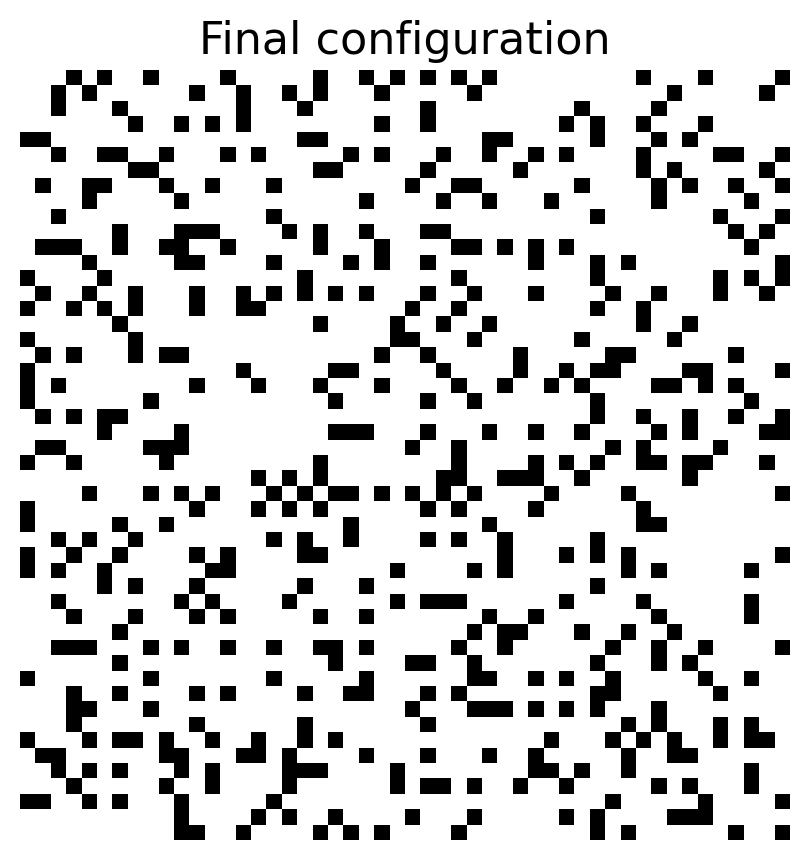

Number of dimers: 810
Fraction filled: 0.648


<Figure size 1600x1200 with 0 Axes>

In [54]:
tau = 10_000

early, final, n_dimers = run_annealing(L, N_steps, T0, tau)

plot_lattice(early, "Early configuration")
plt.savefig("figs/earlyconfig.png",dpi=350)
plot_lattice(final, "Final configuration")
plt.savefig("figs/finalconfig.png",dpi=350)

print("Number of dimers:", n_dimers)
print("Fraction filled:", 2 * n_dimers / (L * L))


In [41]:
taus = [1_000, 5_000, 10_000, 50_000]
results = []

for tau in taus:
    _, _, n_dimers = run_annealing(L, N_steps, T0, tau)
    fill_fraction = 2 * n_dimers / (L * L)
    results.append((tau, n_dimers, fill_fraction))

In [42]:
print("Cooling time τ | Dimers | Fraction filled")
print("------------------------------------------")
for tau, n_dimers, frac in results:
    print(f"{tau:12d} | {n_dimers:6d} | {frac:.4f}")


Cooling time τ | Dimers | Fraction filled
------------------------------------------
        1000 |    364 | 0.2912
        5000 |    719 | 0.5752
       10000 |    792 | 0.6336
       50000 |    832 | 0.6656
